In [1]:
from __future__ import print_function, division

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np
import cv2


In [2]:
img_row=28
img_col=28
channel=1
img_shape = (img_row,img_col, channel)
latent_dim = 100
optimizer = Adam(0.0002, 0.5)

In [3]:
def build_generator():

    model = Sequential()

    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()
    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)


In [4]:
def build_discriminator():

    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape= img_shape)
    validity = model(img)

    return Model(img, validity)

In [5]:
(X_train, _), (_, _) = mnist.load_data()
batch_size=128
sample_interval=50
# Rescale -1 to 1
X_train = X_train / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

In [6]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
GAN = Model(z, validity)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
__________________________________________________

In [7]:
def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    #gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    if epoch>=0:
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0],cmap='gray_r')
                axs[i,j].axis('off')

                cnt =cnt+ 1
    #         plt.savefig("images/%d.png" % epoch)
        plt.show(epoch)

0 [D loss: 0.731019, acc.: 43.36%] [G loss: 0.782252]


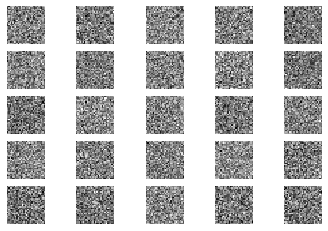

1 [D loss: 0.377510, acc.: 90.23%] [G loss: 0.744093]
2 [D loss: 0.332960, acc.: 90.62%] [G loss: 0.777614]
3 [D loss: 0.329535, acc.: 87.50%] [G loss: 0.790168]
4 [D loss: 0.319549, acc.: 87.50%] [G loss: 0.827634]
5 [D loss: 0.301889, acc.: 92.58%] [G loss: 0.933990]
6 [D loss: 0.279623, acc.: 94.92%] [G loss: 1.051495]
7 [D loss: 0.237045, acc.: 98.05%] [G loss: 1.180459]
8 [D loss: 0.207938, acc.: 99.61%] [G loss: 1.306614]
9 [D loss: 0.184955, acc.: 99.61%] [G loss: 1.452852]
10 [D loss: 0.168425, acc.: 100.00%] [G loss: 1.580850]
11 [D loss: 0.143863, acc.: 100.00%] [G loss: 1.729655]
12 [D loss: 0.121373, acc.: 100.00%] [G loss: 1.837123]
13 [D loss: 0.109612, acc.: 100.00%] [G loss: 1.973898]
14 [D loss: 0.093484, acc.: 100.00%] [G loss: 2.075722]
15 [D loss: 0.092456, acc.: 100.00%] [G loss: 2.200836]
16 [D loss: 0.085381, acc.: 100.00%] [G loss: 2.284234]
17 [D loss: 0.071358, acc.: 100.00%] [G loss: 2.358403]
18 [D loss: 0.067699, acc.: 100.00%] [G loss: 2.432816]
19 [D loss

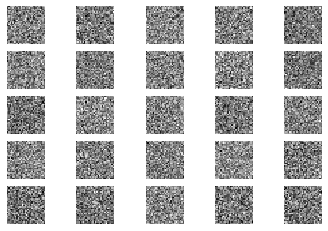

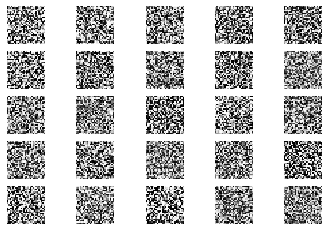

51 [D loss: 0.024952, acc.: 100.00%] [G loss: 3.644686]
52 [D loss: 0.023668, acc.: 100.00%] [G loss: 3.650291]
53 [D loss: 0.029343, acc.: 100.00%] [G loss: 3.687434]
54 [D loss: 0.022964, acc.: 100.00%] [G loss: 3.683236]
55 [D loss: 0.021926, acc.: 100.00%] [G loss: 3.726601]
56 [D loss: 0.025085, acc.: 100.00%] [G loss: 3.708727]
57 [D loss: 0.028694, acc.: 100.00%] [G loss: 3.777864]
58 [D loss: 0.025551, acc.: 100.00%] [G loss: 3.716341]
59 [D loss: 0.031497, acc.: 100.00%] [G loss: 3.813752]
60 [D loss: 0.025247, acc.: 100.00%] [G loss: 3.907674]
61 [D loss: 0.018948, acc.: 100.00%] [G loss: 3.753019]
62 [D loss: 0.030274, acc.: 100.00%] [G loss: 3.765754]
63 [D loss: 0.024664, acc.: 100.00%] [G loss: 3.863366]
64 [D loss: 0.042611, acc.: 100.00%] [G loss: 3.924630]
65 [D loss: 0.026447, acc.: 100.00%] [G loss: 3.917008]
66 [D loss: 0.037729, acc.: 100.00%] [G loss: 3.915465]
67 [D loss: 0.030219, acc.: 100.00%] [G loss: 4.015289]
68 [D loss: 0.033745, acc.: 99.61%] [G loss: 3.9

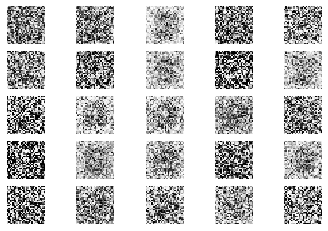

101 [D loss: 0.138697, acc.: 95.70%] [G loss: 3.397742]
102 [D loss: 0.713150, acc.: 73.44%] [G loss: 2.240664]
103 [D loss: 0.312056, acc.: 85.16%] [G loss: 2.211505]
104 [D loss: 0.084180, acc.: 98.44%] [G loss: 3.067698]
105 [D loss: 0.078261, acc.: 99.22%] [G loss: 3.074870]
106 [D loss: 0.180302, acc.: 94.14%] [G loss: 2.886514]
107 [D loss: 0.126580, acc.: 93.75%] [G loss: 3.103516]
108 [D loss: 0.219019, acc.: 91.80%] [G loss: 2.620598]
109 [D loss: 0.146219, acc.: 94.14%] [G loss: 3.015649]
110 [D loss: 0.218456, acc.: 92.19%] [G loss: 2.633780]
111 [D loss: 0.109405, acc.: 96.88%] [G loss: 3.050426]
112 [D loss: 0.275290, acc.: 89.84%] [G loss: 2.760798]
113 [D loss: 0.144439, acc.: 92.97%] [G loss: 3.446432]
114 [D loss: 0.699492, acc.: 73.44%] [G loss: 2.039520]
115 [D loss: 0.400686, acc.: 82.03%] [G loss: 2.297335]
116 [D loss: 0.084252, acc.: 97.66%] [G loss: 3.246010]
117 [D loss: 0.076302, acc.: 100.00%] [G loss: 3.244812]
118 [D loss: 0.132414, acc.: 97.27%] [G loss: 2

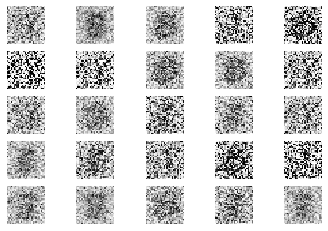

151 [D loss: 0.195763, acc.: 92.19%] [G loss: 3.224567]
152 [D loss: 0.442736, acc.: 83.20%] [G loss: 2.120852]
153 [D loss: 0.253783, acc.: 85.94%] [G loss: 3.553279]
154 [D loss: 0.497079, acc.: 77.34%] [G loss: 1.868444]
155 [D loss: 0.275669, acc.: 85.55%] [G loss: 2.946469]
156 [D loss: 0.145677, acc.: 95.70%] [G loss: 3.627041]
157 [D loss: 0.468788, acc.: 80.08%] [G loss: 2.214480]
158 [D loss: 0.242447, acc.: 86.72%] [G loss: 3.471585]
159 [D loss: 0.410298, acc.: 81.25%] [G loss: 2.344640]
160 [D loss: 0.220960, acc.: 89.84%] [G loss: 3.462640]
161 [D loss: 0.481602, acc.: 80.47%] [G loss: 1.959162]
162 [D loss: 0.262737, acc.: 86.33%] [G loss: 2.957624]
163 [D loss: 0.304248, acc.: 86.72%] [G loss: 3.046868]
164 [D loss: 0.370330, acc.: 82.81%] [G loss: 2.567480]
165 [D loss: 0.327217, acc.: 85.94%] [G loss: 2.724768]
166 [D loss: 0.472890, acc.: 76.56%] [G loss: 2.190002]
167 [D loss: 0.284192, acc.: 86.33%] [G loss: 3.176048]
168 [D loss: 0.804166, acc.: 58.59%] [G loss: 1.

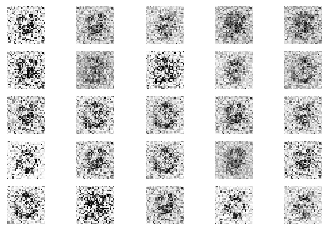

201 [D loss: 0.646881, acc.: 61.33%] [G loss: 1.380324]
202 [D loss: 0.580003, acc.: 59.38%] [G loss: 1.537281]
203 [D loss: 0.583126, acc.: 63.28%] [G loss: 1.446196]
204 [D loss: 0.652677, acc.: 55.47%] [G loss: 1.341823]
205 [D loss: 0.667086, acc.: 51.17%] [G loss: 1.306751]
206 [D loss: 0.718436, acc.: 44.92%] [G loss: 1.187976]
207 [D loss: 0.609877, acc.: 57.42%] [G loss: 1.420091]
208 [D loss: 0.777886, acc.: 40.23%] [G loss: 0.906842]
209 [D loss: 0.566843, acc.: 64.06%] [G loss: 1.364225]
210 [D loss: 0.828803, acc.: 39.06%] [G loss: 0.845597]
211 [D loss: 0.648884, acc.: 50.00%] [G loss: 1.048482]
212 [D loss: 0.679629, acc.: 49.61%] [G loss: 1.041612]
213 [D loss: 0.760905, acc.: 42.58%] [G loss: 0.785596]
214 [D loss: 0.643607, acc.: 49.61%] [G loss: 0.937969]
215 [D loss: 0.692523, acc.: 47.66%] [G loss: 0.928389]
216 [D loss: 0.757231, acc.: 38.67%] [G loss: 0.767164]
217 [D loss: 0.673704, acc.: 48.44%] [G loss: 0.895433]
218 [D loss: 0.665909, acc.: 49.22%] [G loss: 0.

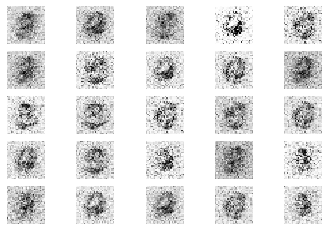

251 [D loss: 0.680667, acc.: 48.44%] [G loss: 0.603612]
252 [D loss: 0.669637, acc.: 47.66%] [G loss: 0.606280]
253 [D loss: 0.673275, acc.: 45.31%] [G loss: 0.614202]
254 [D loss: 0.671607, acc.: 46.09%] [G loss: 0.601580]
255 [D loss: 0.671509, acc.: 46.88%] [G loss: 0.600932]
256 [D loss: 0.677314, acc.: 47.66%] [G loss: 0.602431]
257 [D loss: 0.683071, acc.: 47.27%] [G loss: 0.592505]
258 [D loss: 0.666975, acc.: 49.22%] [G loss: 0.597550]
259 [D loss: 0.675157, acc.: 47.27%] [G loss: 0.609324]
260 [D loss: 0.653244, acc.: 48.44%] [G loss: 0.618885]
261 [D loss: 0.663161, acc.: 48.05%] [G loss: 0.620568]
262 [D loss: 0.665423, acc.: 47.66%] [G loss: 0.630249]
263 [D loss: 0.652721, acc.: 48.83%] [G loss: 0.635633]
264 [D loss: 0.659715, acc.: 47.27%] [G loss: 0.621716]
265 [D loss: 0.660689, acc.: 47.27%] [G loss: 0.621818]
266 [D loss: 0.656190, acc.: 46.48%] [G loss: 0.623903]
267 [D loss: 0.658590, acc.: 47.27%] [G loss: 0.622195]
268 [D loss: 0.673580, acc.: 46.09%] [G loss: 0.

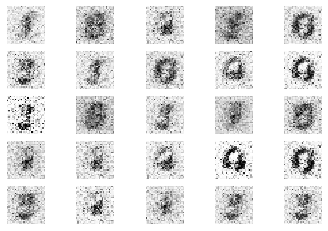

301 [D loss: 0.650183, acc.: 50.00%] [G loss: 0.642183]
302 [D loss: 0.653554, acc.: 49.22%] [G loss: 0.635554]
303 [D loss: 0.661554, acc.: 49.61%] [G loss: 0.634821]
304 [D loss: 0.651878, acc.: 49.22%] [G loss: 0.630503]
305 [D loss: 0.654366, acc.: 50.00%] [G loss: 0.633167]
306 [D loss: 0.647800, acc.: 49.61%] [G loss: 0.636857]
307 [D loss: 0.651382, acc.: 49.22%] [G loss: 0.636954]
308 [D loss: 0.652016, acc.: 48.83%] [G loss: 0.635236]
309 [D loss: 0.659468, acc.: 50.00%] [G loss: 0.637434]
310 [D loss: 0.650164, acc.: 49.61%] [G loss: 0.638228]
311 [D loss: 0.650669, acc.: 50.00%] [G loss: 0.641333]
312 [D loss: 0.646928, acc.: 49.22%] [G loss: 0.645274]
313 [D loss: 0.662531, acc.: 49.61%] [G loss: 0.644738]
314 [D loss: 0.648375, acc.: 49.61%] [G loss: 0.655243]
315 [D loss: 0.657064, acc.: 48.05%] [G loss: 0.648315]
316 [D loss: 0.657284, acc.: 48.83%] [G loss: 0.645768]
317 [D loss: 0.654067, acc.: 49.61%] [G loss: 0.648331]
318 [D loss: 0.657592, acc.: 48.44%] [G loss: 0.

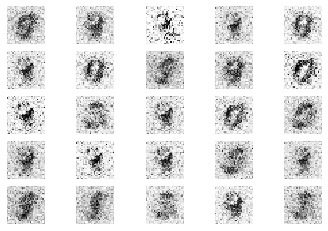

351 [D loss: 0.639932, acc.: 49.61%] [G loss: 0.661345]
352 [D loss: 0.634116, acc.: 50.78%] [G loss: 0.668413]
353 [D loss: 0.645555, acc.: 49.22%] [G loss: 0.665534]
354 [D loss: 0.644677, acc.: 48.44%] [G loss: 0.665997]
355 [D loss: 0.658327, acc.: 46.88%] [G loss: 0.659398]
356 [D loss: 0.633930, acc.: 49.22%] [G loss: 0.666195]
357 [D loss: 0.644134, acc.: 48.83%] [G loss: 0.669411]
358 [D loss: 0.638070, acc.: 49.22%] [G loss: 0.673027]
359 [D loss: 0.648114, acc.: 46.88%] [G loss: 0.665503]
360 [D loss: 0.643820, acc.: 49.22%] [G loss: 0.659961]
361 [D loss: 0.635465, acc.: 49.22%] [G loss: 0.656394]
362 [D loss: 0.636328, acc.: 49.61%] [G loss: 0.664122]
363 [D loss: 0.639347, acc.: 50.00%] [G loss: 0.667441]
364 [D loss: 0.640214, acc.: 49.22%] [G loss: 0.672368]
365 [D loss: 0.629824, acc.: 50.00%] [G loss: 0.674677]
366 [D loss: 0.641349, acc.: 48.83%] [G loss: 0.674107]
367 [D loss: 0.636728, acc.: 49.61%] [G loss: 0.676365]
368 [D loss: 0.638932, acc.: 49.61%] [G loss: 0.

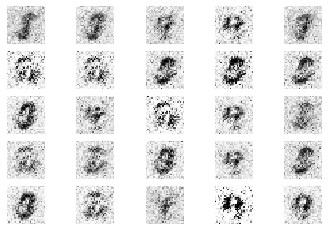

401 [D loss: 0.639274, acc.: 48.44%] [G loss: 0.702502]
402 [D loss: 0.642691, acc.: 50.78%] [G loss: 0.697341]
403 [D loss: 0.653575, acc.: 51.17%] [G loss: 0.695494]
404 [D loss: 0.659804, acc.: 48.44%] [G loss: 0.691040]
405 [D loss: 0.647750, acc.: 50.78%] [G loss: 0.677307]
406 [D loss: 0.656804, acc.: 51.17%] [G loss: 0.676624]
407 [D loss: 0.650641, acc.: 53.12%] [G loss: 0.691670]
408 [D loss: 0.650777, acc.: 52.73%] [G loss: 0.690829]
409 [D loss: 0.649687, acc.: 55.47%] [G loss: 0.691509]
410 [D loss: 0.652035, acc.: 53.52%] [G loss: 0.697550]
411 [D loss: 0.650377, acc.: 54.30%] [G loss: 0.699532]
412 [D loss: 0.660149, acc.: 53.12%] [G loss: 0.706147]
413 [D loss: 0.642723, acc.: 53.91%] [G loss: 0.703049]
414 [D loss: 0.645764, acc.: 52.73%] [G loss: 0.691006]
415 [D loss: 0.646967, acc.: 54.69%] [G loss: 0.690707]
416 [D loss: 0.645383, acc.: 53.12%] [G loss: 0.685779]
417 [D loss: 0.643543, acc.: 55.47%] [G loss: 0.678341]
418 [D loss: 0.655857, acc.: 55.47%] [G loss: 0.

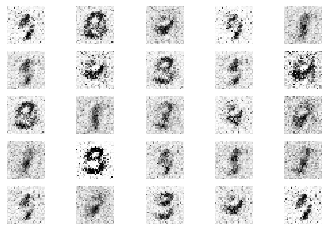

451 [D loss: 0.642333, acc.: 51.17%] [G loss: 0.702855]
452 [D loss: 0.621576, acc.: 51.95%] [G loss: 0.698822]
453 [D loss: 0.620478, acc.: 51.17%] [G loss: 0.711838]
454 [D loss: 0.632136, acc.: 51.95%] [G loss: 0.708420]
455 [D loss: 0.626061, acc.: 51.95%] [G loss: 0.716654]
456 [D loss: 0.622202, acc.: 51.95%] [G loss: 0.714263]
457 [D loss: 0.624806, acc.: 53.12%] [G loss: 0.726249]
458 [D loss: 0.631480, acc.: 53.91%] [G loss: 0.721978]
459 [D loss: 0.623483, acc.: 53.91%] [G loss: 0.713652]
460 [D loss: 0.627006, acc.: 56.25%] [G loss: 0.710159]
461 [D loss: 0.624111, acc.: 56.25%] [G loss: 0.707002]
462 [D loss: 0.615677, acc.: 54.69%] [G loss: 0.705105]
463 [D loss: 0.616740, acc.: 56.64%] [G loss: 0.713104]
464 [D loss: 0.612680, acc.: 57.03%] [G loss: 0.727713]
465 [D loss: 0.603675, acc.: 62.50%] [G loss: 0.740554]
466 [D loss: 0.618121, acc.: 60.55%] [G loss: 0.748909]
467 [D loss: 0.642631, acc.: 54.30%] [G loss: 0.750002]
468 [D loss: 0.620710, acc.: 57.81%] [G loss: 0.

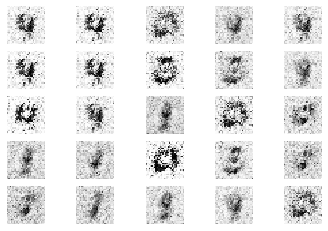

501 [D loss: 0.650835, acc.: 53.52%] [G loss: 0.721164]
502 [D loss: 0.643955, acc.: 55.86%] [G loss: 0.730107]
503 [D loss: 0.635459, acc.: 58.20%] [G loss: 0.723849]
504 [D loss: 0.646579, acc.: 57.42%] [G loss: 0.719664]
505 [D loss: 0.642765, acc.: 58.98%] [G loss: 0.723852]
506 [D loss: 0.633358, acc.: 60.55%] [G loss: 0.727363]
507 [D loss: 0.638076, acc.: 60.94%] [G loss: 0.731406]
508 [D loss: 0.636538, acc.: 59.77%] [G loss: 0.741056]
509 [D loss: 0.643494, acc.: 54.69%] [G loss: 0.747742]
510 [D loss: 0.634047, acc.: 57.03%] [G loss: 0.735958]
511 [D loss: 0.643488, acc.: 51.56%] [G loss: 0.736874]
512 [D loss: 0.640886, acc.: 52.34%] [G loss: 0.738877]
513 [D loss: 0.641214, acc.: 54.69%] [G loss: 0.732961]
514 [D loss: 0.635049, acc.: 54.69%] [G loss: 0.730302]
515 [D loss: 0.621788, acc.: 54.69%] [G loss: 0.742985]
516 [D loss: 0.644498, acc.: 55.08%] [G loss: 0.737807]
517 [D loss: 0.640661, acc.: 52.73%] [G loss: 0.732885]
518 [D loss: 0.626629, acc.: 55.47%] [G loss: 0.

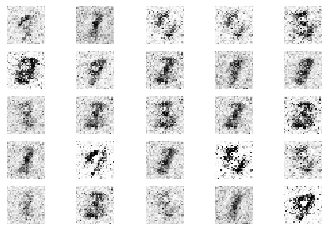

551 [D loss: 0.627478, acc.: 62.50%] [G loss: 0.773546]
552 [D loss: 0.618808, acc.: 60.16%] [G loss: 0.794066]
553 [D loss: 0.609364, acc.: 68.75%] [G loss: 0.796483]
554 [D loss: 0.617922, acc.: 66.41%] [G loss: 0.794436]
555 [D loss: 0.613149, acc.: 67.58%] [G loss: 0.786999]
556 [D loss: 0.631334, acc.: 62.11%] [G loss: 0.777333]
557 [D loss: 0.633108, acc.: 60.16%] [G loss: 0.782113]
558 [D loss: 0.619849, acc.: 65.62%] [G loss: 0.787628]
559 [D loss: 0.620113, acc.: 66.02%] [G loss: 0.820974]
560 [D loss: 0.633839, acc.: 61.72%] [G loss: 0.796710]
561 [D loss: 0.641710, acc.: 61.33%] [G loss: 0.794881]
562 [D loss: 0.623817, acc.: 62.89%] [G loss: 0.817850]
563 [D loss: 0.634209, acc.: 59.38%] [G loss: 0.827214]
564 [D loss: 0.624597, acc.: 68.75%] [G loss: 0.815560]
565 [D loss: 0.620755, acc.: 62.89%] [G loss: 0.811806]
566 [D loss: 0.618634, acc.: 64.45%] [G loss: 0.804267]
567 [D loss: 0.631919, acc.: 65.23%] [G loss: 0.820016]
568 [D loss: 0.641831, acc.: 62.11%] [G loss: 0.

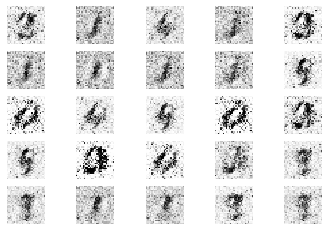

601 [D loss: 0.594401, acc.: 74.61%] [G loss: 0.803640]
602 [D loss: 0.608208, acc.: 67.97%] [G loss: 0.809696]
603 [D loss: 0.580264, acc.: 73.05%] [G loss: 0.831808]
604 [D loss: 0.585089, acc.: 73.83%] [G loss: 0.840662]
605 [D loss: 0.575697, acc.: 73.05%] [G loss: 0.854924]
606 [D loss: 0.600975, acc.: 71.48%] [G loss: 0.847295]
607 [D loss: 0.572423, acc.: 79.30%] [G loss: 0.838520]
608 [D loss: 0.586450, acc.: 71.88%] [G loss: 0.825621]
609 [D loss: 0.586476, acc.: 71.48%] [G loss: 0.806991]
610 [D loss: 0.600832, acc.: 71.09%] [G loss: 0.808339]
611 [D loss: 0.598834, acc.: 72.27%] [G loss: 0.806990]
612 [D loss: 0.581469, acc.: 71.88%] [G loss: 0.815682]
613 [D loss: 0.588399, acc.: 71.48%] [G loss: 0.829490]
614 [D loss: 0.584355, acc.: 73.44%] [G loss: 0.819720]
615 [D loss: 0.581344, acc.: 75.78%] [G loss: 0.816696]
616 [D loss: 0.591888, acc.: 70.31%] [G loss: 0.827830]
617 [D loss: 0.593452, acc.: 69.53%] [G loss: 0.849319]
618 [D loss: 0.597826, acc.: 68.75%] [G loss: 0.

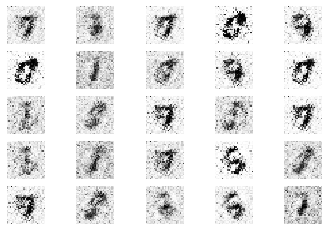

651 [D loss: 0.621059, acc.: 70.70%] [G loss: 0.836480]
652 [D loss: 0.614201, acc.: 67.58%] [G loss: 0.821458]
653 [D loss: 0.614487, acc.: 63.67%] [G loss: 0.831224]
654 [D loss: 0.603124, acc.: 69.14%] [G loss: 0.856093]
655 [D loss: 0.593748, acc.: 73.83%] [G loss: 0.861637]
656 [D loss: 0.599259, acc.: 73.44%] [G loss: 0.876844]
657 [D loss: 0.593243, acc.: 72.66%] [G loss: 0.868273]
658 [D loss: 0.593247, acc.: 71.09%] [G loss: 0.858568]
659 [D loss: 0.590256, acc.: 72.66%] [G loss: 0.842167]
660 [D loss: 0.585452, acc.: 70.70%] [G loss: 0.840561]
661 [D loss: 0.609982, acc.: 69.92%] [G loss: 0.835621]
662 [D loss: 0.599817, acc.: 67.58%] [G loss: 0.834209]
663 [D loss: 0.623147, acc.: 66.80%] [G loss: 0.828286]
664 [D loss: 0.622704, acc.: 60.16%] [G loss: 0.840185]
665 [D loss: 0.627695, acc.: 64.06%] [G loss: 0.867920]
666 [D loss: 0.605381, acc.: 69.14%] [G loss: 0.890395]
667 [D loss: 0.610548, acc.: 72.27%] [G loss: 0.890062]
668 [D loss: 0.616738, acc.: 65.62%] [G loss: 0.

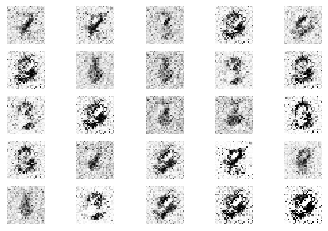

701 [D loss: 0.613999, acc.: 63.67%] [G loss: 0.862495]
702 [D loss: 0.586294, acc.: 64.06%] [G loss: 0.882088]
703 [D loss: 0.584246, acc.: 71.09%] [G loss: 0.912148]
704 [D loss: 0.597363, acc.: 68.75%] [G loss: 0.907932]
705 [D loss: 0.616812, acc.: 63.67%] [G loss: 0.895931]
706 [D loss: 0.587454, acc.: 68.36%] [G loss: 0.898368]
707 [D loss: 0.619674, acc.: 63.67%] [G loss: 0.907961]
708 [D loss: 0.604325, acc.: 69.53%] [G loss: 0.949839]
709 [D loss: 0.609590, acc.: 71.88%] [G loss: 0.922384]
710 [D loss: 0.613559, acc.: 69.14%] [G loss: 0.889141]
711 [D loss: 0.596019, acc.: 68.36%] [G loss: 0.909527]
712 [D loss: 0.596912, acc.: 69.92%] [G loss: 0.919506]
713 [D loss: 0.628498, acc.: 64.06%] [G loss: 0.914518]
714 [D loss: 0.606741, acc.: 66.02%] [G loss: 0.946965]
715 [D loss: 0.607463, acc.: 69.14%] [G loss: 0.966510]
716 [D loss: 0.606227, acc.: 69.53%] [G loss: 0.922460]
717 [D loss: 0.602192, acc.: 66.02%] [G loss: 0.930803]
718 [D loss: 0.565955, acc.: 75.78%] [G loss: 0.

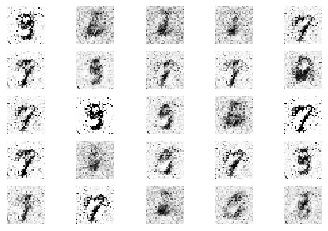

751 [D loss: 0.591482, acc.: 71.88%] [G loss: 0.880820]
752 [D loss: 0.580798, acc.: 75.78%] [G loss: 0.874642]
753 [D loss: 0.592137, acc.: 73.05%] [G loss: 0.855982]
754 [D loss: 0.589681, acc.: 68.36%] [G loss: 0.868058]
755 [D loss: 0.583585, acc.: 71.09%] [G loss: 0.882020]
756 [D loss: 0.626691, acc.: 59.38%] [G loss: 0.873080]
757 [D loss: 0.603215, acc.: 67.19%] [G loss: 0.858988]
758 [D loss: 0.592148, acc.: 71.09%] [G loss: 0.862104]
759 [D loss: 0.597338, acc.: 69.14%] [G loss: 0.866568]
760 [D loss: 0.629113, acc.: 62.50%] [G loss: 0.855948]
761 [D loss: 0.605392, acc.: 64.84%] [G loss: 0.868397]
762 [D loss: 0.616816, acc.: 61.72%] [G loss: 0.932718]
763 [D loss: 0.639322, acc.: 62.11%] [G loss: 0.904202]
764 [D loss: 0.603249, acc.: 66.80%] [G loss: 0.909599]
765 [D loss: 0.608469, acc.: 68.36%] [G loss: 0.935480]
766 [D loss: 0.609937, acc.: 67.97%] [G loss: 0.937804]
767 [D loss: 0.637236, acc.: 57.03%] [G loss: 0.898227]
768 [D loss: 0.627324, acc.: 60.55%] [G loss: 0.

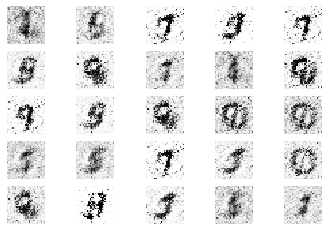

801 [D loss: 0.620431, acc.: 66.80%] [G loss: 0.864518]
802 [D loss: 0.588155, acc.: 75.39%] [G loss: 0.919216]
803 [D loss: 0.622708, acc.: 63.28%] [G loss: 0.862052]
804 [D loss: 0.590351, acc.: 74.61%] [G loss: 0.886129]
805 [D loss: 0.574267, acc.: 76.17%] [G loss: 0.904370]
806 [D loss: 0.601731, acc.: 70.31%] [G loss: 0.906645]
807 [D loss: 0.587311, acc.: 78.52%] [G loss: 0.882015]
808 [D loss: 0.609459, acc.: 68.36%] [G loss: 0.858081]
809 [D loss: 0.609672, acc.: 64.45%] [G loss: 0.876912]
810 [D loss: 0.595882, acc.: 69.14%] [G loss: 0.895826]
811 [D loss: 0.597436, acc.: 68.36%] [G loss: 0.884595]
812 [D loss: 0.631312, acc.: 63.67%] [G loss: 0.870437]
813 [D loss: 0.640819, acc.: 60.94%] [G loss: 0.860407]
814 [D loss: 0.636046, acc.: 61.72%] [G loss: 0.877700]
815 [D loss: 0.618577, acc.: 64.45%] [G loss: 0.861794]
816 [D loss: 0.639733, acc.: 60.94%] [G loss: 0.873796]
817 [D loss: 0.631656, acc.: 63.67%] [G loss: 0.891846]
818 [D loss: 0.648593, acc.: 58.59%] [G loss: 0.

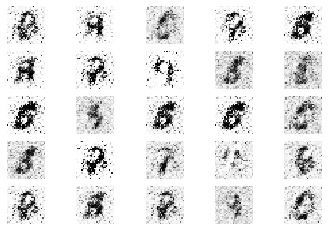

851 [D loss: 0.577094, acc.: 78.12%] [G loss: 0.910664]
852 [D loss: 0.611942, acc.: 64.45%] [G loss: 0.895362]
853 [D loss: 0.608397, acc.: 62.50%] [G loss: 0.921189]
854 [D loss: 0.617603, acc.: 62.11%] [G loss: 0.916389]
855 [D loss: 0.622189, acc.: 62.11%] [G loss: 0.916053]
856 [D loss: 0.579557, acc.: 77.34%] [G loss: 0.928487]
857 [D loss: 0.585841, acc.: 74.61%] [G loss: 0.912155]
858 [D loss: 0.596252, acc.: 71.48%] [G loss: 0.902651]
859 [D loss: 0.603773, acc.: 72.66%] [G loss: 0.903127]
860 [D loss: 0.583511, acc.: 78.12%] [G loss: 0.917650]
861 [D loss: 0.588497, acc.: 78.12%] [G loss: 0.938726]
862 [D loss: 0.570502, acc.: 80.47%] [G loss: 0.937899]
863 [D loss: 0.573972, acc.: 78.52%] [G loss: 0.939807]
864 [D loss: 0.556290, acc.: 84.38%] [G loss: 0.998220]
865 [D loss: 0.548618, acc.: 85.94%] [G loss: 0.984715]
866 [D loss: 0.577926, acc.: 81.25%] [G loss: 0.954357]
867 [D loss: 0.572463, acc.: 74.22%] [G loss: 0.965777]
868 [D loss: 0.568715, acc.: 80.47%] [G loss: 0.

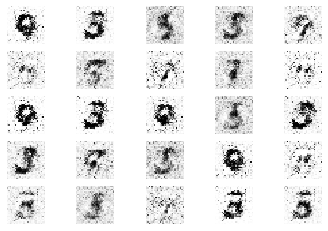

901 [D loss: 0.613435, acc.: 66.02%] [G loss: 0.910325]
902 [D loss: 0.599069, acc.: 67.97%] [G loss: 0.908946]
903 [D loss: 0.621101, acc.: 65.62%] [G loss: 0.921231]
904 [D loss: 0.618179, acc.: 67.58%] [G loss: 0.958044]
905 [D loss: 0.599622, acc.: 69.53%] [G loss: 0.972631]
906 [D loss: 0.587914, acc.: 69.92%] [G loss: 0.993386]
907 [D loss: 0.608099, acc.: 68.75%] [G loss: 0.993739]
908 [D loss: 0.590184, acc.: 73.83%] [G loss: 0.979059]
909 [D loss: 0.614569, acc.: 66.41%] [G loss: 1.037157]
910 [D loss: 0.559672, acc.: 79.69%] [G loss: 1.022912]
911 [D loss: 0.595073, acc.: 72.66%] [G loss: 1.019961]
912 [D loss: 0.580238, acc.: 75.39%] [G loss: 0.972030]
913 [D loss: 0.584809, acc.: 71.88%] [G loss: 0.976590]
914 [D loss: 0.598379, acc.: 70.70%] [G loss: 0.990416]
915 [D loss: 0.602082, acc.: 70.31%] [G loss: 0.976967]
916 [D loss: 0.579233, acc.: 74.22%] [G loss: 0.982358]
917 [D loss: 0.592418, acc.: 71.88%] [G loss: 1.015872]
918 [D loss: 0.574552, acc.: 75.39%] [G loss: 1.

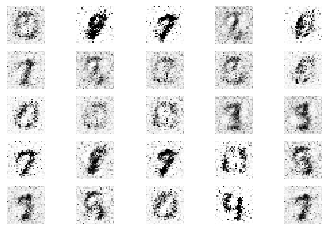

951 [D loss: 0.571978, acc.: 73.83%] [G loss: 0.981079]
952 [D loss: 0.613550, acc.: 67.58%] [G loss: 0.951353]
953 [D loss: 0.616141, acc.: 66.02%] [G loss: 0.938727]
954 [D loss: 0.606317, acc.: 64.84%] [G loss: 0.986535]
955 [D loss: 0.602008, acc.: 68.75%] [G loss: 0.992099]
956 [D loss: 0.605789, acc.: 68.36%] [G loss: 0.947424]
957 [D loss: 0.590472, acc.: 71.09%] [G loss: 0.930821]
958 [D loss: 0.623002, acc.: 65.62%] [G loss: 0.923493]
959 [D loss: 0.603605, acc.: 67.19%] [G loss: 0.928514]
960 [D loss: 0.619920, acc.: 67.97%] [G loss: 0.922163]
961 [D loss: 0.588566, acc.: 69.53%] [G loss: 0.959213]
962 [D loss: 0.576999, acc.: 74.61%] [G loss: 0.982257]
963 [D loss: 0.599978, acc.: 67.19%] [G loss: 0.981341]
964 [D loss: 0.608719, acc.: 71.48%] [G loss: 0.962594]
965 [D loss: 0.608117, acc.: 72.66%] [G loss: 0.932241]
966 [D loss: 0.596607, acc.: 68.36%] [G loss: 0.925744]
967 [D loss: 0.599313, acc.: 67.97%] [G loss: 0.957558]
968 [D loss: 0.596621, acc.: 70.70%] [G loss: 0.

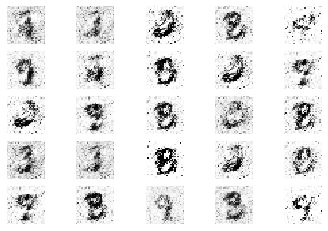

1001 [D loss: 0.587012, acc.: 73.44%] [G loss: 0.993733]
1002 [D loss: 0.582130, acc.: 70.31%] [G loss: 1.005278]
1003 [D loss: 0.565358, acc.: 80.08%] [G loss: 0.982735]
1004 [D loss: 0.572413, acc.: 80.08%] [G loss: 0.966377]
1005 [D loss: 0.583222, acc.: 73.44%] [G loss: 0.979922]
1006 [D loss: 0.586062, acc.: 68.36%] [G loss: 0.983586]
1007 [D loss: 0.555865, acc.: 77.73%] [G loss: 0.975654]
1008 [D loss: 0.601990, acc.: 68.75%] [G loss: 0.959011]
1009 [D loss: 0.597168, acc.: 67.97%] [G loss: 0.937796]
1010 [D loss: 0.595802, acc.: 70.31%] [G loss: 0.913868]
1011 [D loss: 0.590882, acc.: 67.97%] [G loss: 0.925467]
1012 [D loss: 0.596778, acc.: 67.19%] [G loss: 0.961508]
1013 [D loss: 0.597489, acc.: 68.75%] [G loss: 0.980191]
1014 [D loss: 0.572760, acc.: 76.17%] [G loss: 0.955170]
1015 [D loss: 0.571086, acc.: 77.34%] [G loss: 0.989833]
1016 [D loss: 0.576618, acc.: 76.95%] [G loss: 1.004504]
1017 [D loss: 0.575326, acc.: 76.95%] [G loss: 1.033494]
1018 [D loss: 0.564989, acc.: 8

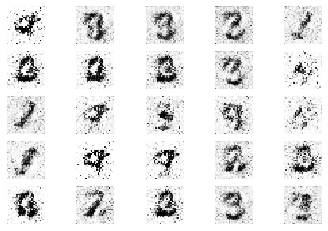

1051 [D loss: 0.596952, acc.: 71.88%] [G loss: 0.962169]
1052 [D loss: 0.593530, acc.: 68.36%] [G loss: 0.985441]
1053 [D loss: 0.559261, acc.: 78.52%] [G loss: 0.993873]
1054 [D loss: 0.599931, acc.: 68.36%] [G loss: 0.992828]
1055 [D loss: 0.597610, acc.: 68.75%] [G loss: 0.969930]
1056 [D loss: 0.596361, acc.: 67.19%] [G loss: 0.967267]
1057 [D loss: 0.594253, acc.: 67.19%] [G loss: 0.953834]
1058 [D loss: 0.590530, acc.: 70.31%] [G loss: 0.943661]
1059 [D loss: 0.601093, acc.: 68.36%] [G loss: 0.936258]
1060 [D loss: 0.568267, acc.: 76.17%] [G loss: 0.963087]
1061 [D loss: 0.608516, acc.: 71.09%] [G loss: 0.930594]
1062 [D loss: 0.586130, acc.: 67.58%] [G loss: 0.952121]
1063 [D loss: 0.581136, acc.: 71.09%] [G loss: 1.005676]
1064 [D loss: 0.602313, acc.: 66.02%] [G loss: 1.010271]
1065 [D loss: 0.626197, acc.: 64.45%] [G loss: 0.966419]
1066 [D loss: 0.583130, acc.: 70.31%] [G loss: 0.954383]
1067 [D loss: 0.603951, acc.: 72.27%] [G loss: 0.991822]
1068 [D loss: 0.661218, acc.: 5

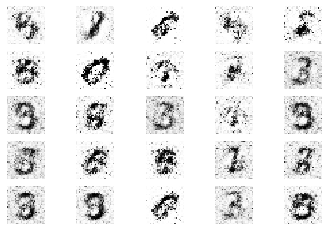

1101 [D loss: 0.569359, acc.: 76.95%] [G loss: 0.946811]
1102 [D loss: 0.574417, acc.: 71.48%] [G loss: 0.968520]
1103 [D loss: 0.578813, acc.: 74.61%] [G loss: 0.947591]
1104 [D loss: 0.575897, acc.: 76.56%] [G loss: 0.944304]
1105 [D loss: 0.569849, acc.: 76.17%] [G loss: 0.943118]
1106 [D loss: 0.577777, acc.: 78.52%] [G loss: 0.944686]
1107 [D loss: 0.603964, acc.: 67.97%] [G loss: 0.915556]
1108 [D loss: 0.590566, acc.: 68.75%] [G loss: 0.913006]
1109 [D loss: 0.562648, acc.: 80.47%] [G loss: 0.898120]
1110 [D loss: 0.559062, acc.: 75.78%] [G loss: 0.899989]
1111 [D loss: 0.611813, acc.: 62.50%] [G loss: 0.926365]
1112 [D loss: 0.585766, acc.: 69.92%] [G loss: 0.950807]
1113 [D loss: 0.591897, acc.: 69.92%] [G loss: 0.970219]
1114 [D loss: 0.588300, acc.: 69.92%] [G loss: 0.913337]
1115 [D loss: 0.581108, acc.: 73.05%] [G loss: 0.956112]
1116 [D loss: 0.596084, acc.: 67.97%] [G loss: 0.942809]
1117 [D loss: 0.579642, acc.: 71.88%] [G loss: 0.959611]
1118 [D loss: 0.607098, acc.: 6

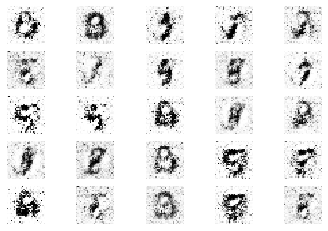

1151 [D loss: 0.588181, acc.: 70.31%] [G loss: 0.973683]
1152 [D loss: 0.574671, acc.: 73.44%] [G loss: 0.958312]
1153 [D loss: 0.589264, acc.: 72.27%] [G loss: 0.919691]
1154 [D loss: 0.593792, acc.: 67.19%] [G loss: 0.938919]
1155 [D loss: 0.563556, acc.: 73.44%] [G loss: 0.947704]
1156 [D loss: 0.570998, acc.: 75.00%] [G loss: 0.963958]
1157 [D loss: 0.590420, acc.: 75.00%] [G loss: 0.953614]
1158 [D loss: 0.538433, acc.: 82.81%] [G loss: 0.973448]
1159 [D loss: 0.586902, acc.: 75.39%] [G loss: 0.931524]
1160 [D loss: 0.567540, acc.: 73.44%] [G loss: 0.967960]
1161 [D loss: 0.558418, acc.: 76.56%] [G loss: 0.991474]
1162 [D loss: 0.538723, acc.: 80.47%] [G loss: 0.992715]
1163 [D loss: 0.575123, acc.: 71.09%] [G loss: 1.012843]
1164 [D loss: 0.556038, acc.: 76.56%] [G loss: 1.022121]
1165 [D loss: 0.568820, acc.: 71.88%] [G loss: 1.046908]
1166 [D loss: 0.574369, acc.: 75.78%] [G loss: 0.984308]
1167 [D loss: 0.572484, acc.: 73.83%] [G loss: 0.990623]
1168 [D loss: 0.585763, acc.: 7

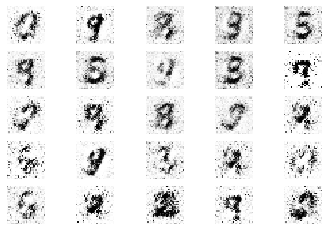

1201 [D loss: 0.542529, acc.: 78.12%] [G loss: 1.057616]
1202 [D loss: 0.549976, acc.: 77.34%] [G loss: 1.020501]
1203 [D loss: 0.548679, acc.: 75.39%] [G loss: 0.987798]
1204 [D loss: 0.590473, acc.: 70.70%] [G loss: 0.988013]
1205 [D loss: 0.529839, acc.: 81.25%] [G loss: 1.007877]
1206 [D loss: 0.551031, acc.: 80.47%] [G loss: 1.012962]
1207 [D loss: 0.525769, acc.: 83.59%] [G loss: 1.025205]
1208 [D loss: 0.567862, acc.: 76.56%] [G loss: 0.977776]
1209 [D loss: 0.549399, acc.: 78.52%] [G loss: 0.981559]
1210 [D loss: 0.548698, acc.: 80.08%] [G loss: 0.968249]
1211 [D loss: 0.542183, acc.: 79.69%] [G loss: 1.011371]
1212 [D loss: 0.538578, acc.: 79.69%] [G loss: 1.023875]
1213 [D loss: 0.603935, acc.: 68.75%] [G loss: 0.974798]
1214 [D loss: 0.564974, acc.: 76.56%] [G loss: 0.984994]
1215 [D loss: 0.554546, acc.: 78.12%] [G loss: 1.016836]
1216 [D loss: 0.543972, acc.: 80.86%] [G loss: 1.044400]
1217 [D loss: 0.569599, acc.: 76.17%] [G loss: 1.026355]
1218 [D loss: 0.564465, acc.: 8

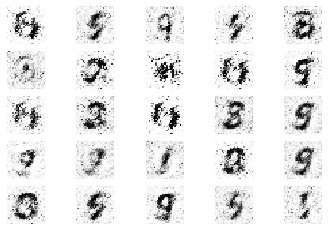

1251 [D loss: 0.570870, acc.: 73.44%] [G loss: 1.054860]
1252 [D loss: 0.534520, acc.: 80.86%] [G loss: 1.039701]
1253 [D loss: 0.550139, acc.: 78.12%] [G loss: 1.080535]
1254 [D loss: 0.553175, acc.: 76.95%] [G loss: 1.080434]
1255 [D loss: 0.574784, acc.: 73.83%] [G loss: 1.020445]
1256 [D loss: 0.559824, acc.: 78.12%] [G loss: 1.044899]
1257 [D loss: 0.558630, acc.: 78.12%] [G loss: 1.062299]
1258 [D loss: 0.583302, acc.: 71.09%] [G loss: 0.998802]
1259 [D loss: 0.548677, acc.: 76.95%] [G loss: 1.018261]
1260 [D loss: 0.568134, acc.: 75.39%] [G loss: 1.024607]
1261 [D loss: 0.572367, acc.: 75.39%] [G loss: 1.045024]
1262 [D loss: 0.574492, acc.: 76.95%] [G loss: 1.023909]
1263 [D loss: 0.551462, acc.: 80.86%] [G loss: 1.039453]
1264 [D loss: 0.565280, acc.: 77.34%] [G loss: 1.061763]
1265 [D loss: 0.582100, acc.: 75.78%] [G loss: 1.064361]
1266 [D loss: 0.554570, acc.: 77.73%] [G loss: 1.043098]
1267 [D loss: 0.568882, acc.: 76.95%] [G loss: 1.036300]
1268 [D loss: 0.573073, acc.: 7

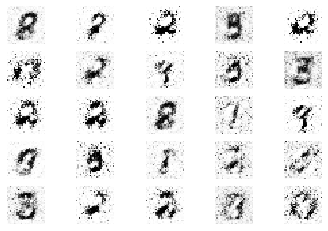

1301 [D loss: 0.580255, acc.: 68.36%] [G loss: 1.022325]
1302 [D loss: 0.588458, acc.: 71.88%] [G loss: 1.019211]
1303 [D loss: 0.567438, acc.: 74.22%] [G loss: 1.028426]
1304 [D loss: 0.593913, acc.: 73.05%] [G loss: 1.005264]
1305 [D loss: 0.579549, acc.: 70.70%] [G loss: 0.974165]
1306 [D loss: 0.561218, acc.: 77.34%] [G loss: 1.003891]
1307 [D loss: 0.595901, acc.: 69.53%] [G loss: 1.027999]
1308 [D loss: 0.568993, acc.: 71.88%] [G loss: 1.021794]
1309 [D loss: 0.566918, acc.: 76.95%] [G loss: 1.028311]
1310 [D loss: 0.576173, acc.: 73.44%] [G loss: 1.011590]
1311 [D loss: 0.587226, acc.: 73.83%] [G loss: 0.980672]
1312 [D loss: 0.576286, acc.: 73.05%] [G loss: 1.005639]
1313 [D loss: 0.599477, acc.: 67.97%] [G loss: 0.999545]
1314 [D loss: 0.576584, acc.: 74.61%] [G loss: 1.015447]
1315 [D loss: 0.605172, acc.: 70.70%] [G loss: 0.982137]
1316 [D loss: 0.590931, acc.: 69.53%] [G loss: 0.985503]
1317 [D loss: 0.571051, acc.: 73.44%] [G loss: 1.015413]
1318 [D loss: 0.616800, acc.: 6

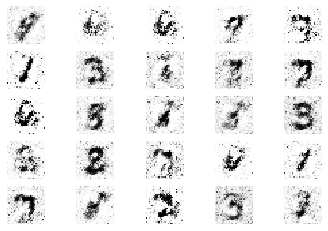

1351 [D loss: 0.584046, acc.: 72.27%] [G loss: 1.039070]
1352 [D loss: 0.602080, acc.: 69.92%] [G loss: 0.968112]
1353 [D loss: 0.578640, acc.: 71.09%] [G loss: 1.023756]
1354 [D loss: 0.584735, acc.: 70.70%] [G loss: 1.005075]
1355 [D loss: 0.579461, acc.: 74.61%] [G loss: 1.031458]
1356 [D loss: 0.585660, acc.: 69.92%] [G loss: 1.014926]
1357 [D loss: 0.555465, acc.: 74.22%] [G loss: 1.005259]
1358 [D loss: 0.574337, acc.: 73.83%] [G loss: 0.988954]
1359 [D loss: 0.572248, acc.: 73.05%] [G loss: 0.996979]
1360 [D loss: 0.552760, acc.: 77.34%] [G loss: 1.003449]
1361 [D loss: 0.559323, acc.: 72.27%] [G loss: 1.026079]
1362 [D loss: 0.556372, acc.: 76.17%] [G loss: 1.025499]
1363 [D loss: 0.591493, acc.: 68.75%] [G loss: 1.048868]
1364 [D loss: 0.578209, acc.: 71.88%] [G loss: 1.049547]
1365 [D loss: 0.580258, acc.: 68.75%] [G loss: 1.044692]
1366 [D loss: 0.576540, acc.: 71.88%] [G loss: 1.012117]
1367 [D loss: 0.590578, acc.: 68.75%] [G loss: 0.986432]
1368 [D loss: 0.587044, acc.: 7

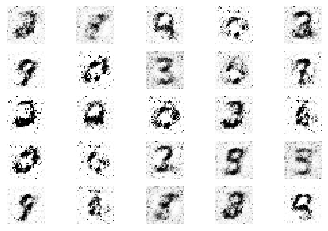

1401 [D loss: 0.580701, acc.: 75.00%] [G loss: 1.012930]
1402 [D loss: 0.596463, acc.: 68.36%] [G loss: 0.975556]
1403 [D loss: 0.583582, acc.: 71.09%] [G loss: 0.981720]
1404 [D loss: 0.556476, acc.: 79.30%] [G loss: 1.011539]
1405 [D loss: 0.576127, acc.: 73.44%] [G loss: 1.001899]
1406 [D loss: 0.586035, acc.: 73.05%] [G loss: 0.981501]
1407 [D loss: 0.588715, acc.: 71.09%] [G loss: 1.007780]
1408 [D loss: 0.583555, acc.: 71.09%] [G loss: 0.987127]
1409 [D loss: 0.575505, acc.: 71.48%] [G loss: 0.982019]
1410 [D loss: 0.576257, acc.: 71.88%] [G loss: 0.978452]
1411 [D loss: 0.546840, acc.: 76.95%] [G loss: 1.015294]
1412 [D loss: 0.552193, acc.: 75.00%] [G loss: 1.005885]
1413 [D loss: 0.590760, acc.: 67.58%] [G loss: 1.014312]
1414 [D loss: 0.575674, acc.: 71.48%] [G loss: 1.027904]
1415 [D loss: 0.547969, acc.: 79.30%] [G loss: 1.072598]
1416 [D loss: 0.570404, acc.: 73.05%] [G loss: 1.022852]
1417 [D loss: 0.553024, acc.: 75.39%] [G loss: 1.010482]
1418 [D loss: 0.574457, acc.: 7

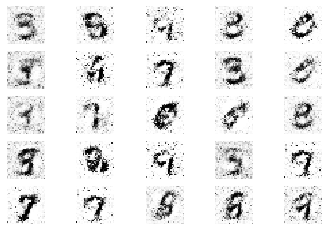

1451 [D loss: 0.589833, acc.: 71.09%] [G loss: 0.982172]
1452 [D loss: 0.595065, acc.: 67.19%] [G loss: 1.007247]
1453 [D loss: 0.615604, acc.: 67.19%] [G loss: 0.978306]
1454 [D loss: 0.625343, acc.: 64.06%] [G loss: 0.968988]
1455 [D loss: 0.608037, acc.: 66.80%] [G loss: 0.987226]
1456 [D loss: 0.634533, acc.: 62.50%] [G loss: 0.948381]
1457 [D loss: 0.622115, acc.: 63.67%] [G loss: 0.969436]
1458 [D loss: 0.628642, acc.: 67.97%] [G loss: 0.933497]
1459 [D loss: 0.619618, acc.: 64.84%] [G loss: 0.961128]
1460 [D loss: 0.618822, acc.: 63.28%] [G loss: 0.968448]
1461 [D loss: 0.602023, acc.: 67.19%] [G loss: 0.976913]
1462 [D loss: 0.576431, acc.: 71.88%] [G loss: 1.021946]
1463 [D loss: 0.580807, acc.: 71.88%] [G loss: 0.998025]
1464 [D loss: 0.607080, acc.: 66.41%] [G loss: 0.999526]
1465 [D loss: 0.574076, acc.: 72.27%] [G loss: 0.999010]
1466 [D loss: 0.567886, acc.: 73.44%] [G loss: 1.025674]
1467 [D loss: 0.622934, acc.: 61.72%] [G loss: 1.003055]
1468 [D loss: 0.602240, acc.: 6

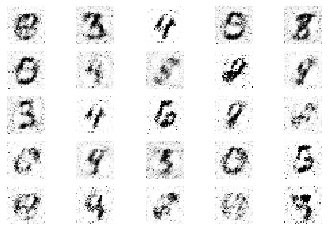

1501 [D loss: 0.574963, acc.: 67.97%] [G loss: 0.985829]
1502 [D loss: 0.573516, acc.: 75.00%] [G loss: 1.009421]
1503 [D loss: 0.580968, acc.: 72.27%] [G loss: 0.988876]
1504 [D loss: 0.615340, acc.: 63.28%] [G loss: 0.967138]
1505 [D loss: 0.596483, acc.: 66.02%] [G loss: 0.974697]
1506 [D loss: 0.579132, acc.: 74.22%] [G loss: 0.964109]
1507 [D loss: 0.603887, acc.: 67.19%] [G loss: 0.958549]
1508 [D loss: 0.574055, acc.: 72.66%] [G loss: 0.978645]
1509 [D loss: 0.576107, acc.: 75.00%] [G loss: 0.998777]
1510 [D loss: 0.601345, acc.: 71.09%] [G loss: 0.959452]
1511 [D loss: 0.575711, acc.: 75.00%] [G loss: 0.951744]
1512 [D loss: 0.584517, acc.: 74.61%] [G loss: 0.981314]
1513 [D loss: 0.573505, acc.: 69.92%] [G loss: 0.971953]
1514 [D loss: 0.606615, acc.: 67.19%] [G loss: 0.996806]
1515 [D loss: 0.588838, acc.: 70.31%] [G loss: 0.983050]
1516 [D loss: 0.570908, acc.: 72.66%] [G loss: 1.016291]
1517 [D loss: 0.571269, acc.: 76.17%] [G loss: 0.965076]
1518 [D loss: 0.557696, acc.: 7

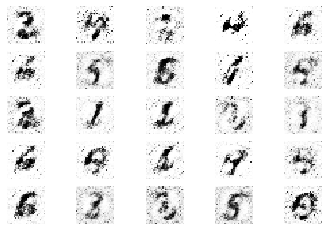

1551 [D loss: 0.554614, acc.: 75.78%] [G loss: 1.012403]
1552 [D loss: 0.570300, acc.: 75.78%] [G loss: 1.022225]
1553 [D loss: 0.561741, acc.: 75.78%] [G loss: 1.017619]
1554 [D loss: 0.562866, acc.: 73.83%] [G loss: 1.050429]
1555 [D loss: 0.571816, acc.: 71.48%] [G loss: 0.978248]
1556 [D loss: 0.580674, acc.: 70.31%] [G loss: 0.999068]
1557 [D loss: 0.543175, acc.: 78.91%] [G loss: 1.025648]
1558 [D loss: 0.567613, acc.: 73.83%] [G loss: 1.027460]
1559 [D loss: 0.548464, acc.: 77.34%] [G loss: 1.006087]
1560 [D loss: 0.556891, acc.: 76.95%] [G loss: 1.015222]
1561 [D loss: 0.560703, acc.: 73.83%] [G loss: 1.056892]
1562 [D loss: 0.534441, acc.: 78.91%] [G loss: 1.024750]
1563 [D loss: 0.584732, acc.: 72.27%] [G loss: 1.015034]
1564 [D loss: 0.541727, acc.: 79.30%] [G loss: 1.015807]
1565 [D loss: 0.581404, acc.: 72.27%] [G loss: 1.019856]
1566 [D loss: 0.571269, acc.: 74.22%] [G loss: 0.988283]
1567 [D loss: 0.572568, acc.: 72.27%] [G loss: 1.012040]
1568 [D loss: 0.548658, acc.: 7

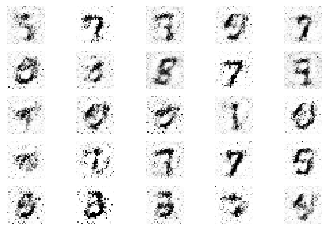

1601 [D loss: 0.589889, acc.: 67.97%] [G loss: 0.987103]
1602 [D loss: 0.570673, acc.: 73.44%] [G loss: 1.027812]
1603 [D loss: 0.578861, acc.: 73.44%] [G loss: 1.020682]
1604 [D loss: 0.581798, acc.: 70.70%] [G loss: 1.007161]
1605 [D loss: 0.605762, acc.: 66.41%] [G loss: 0.975302]
1606 [D loss: 0.593593, acc.: 71.48%] [G loss: 0.965273]
1607 [D loss: 0.576538, acc.: 71.48%] [G loss: 0.999924]
1608 [D loss: 0.596982, acc.: 67.58%] [G loss: 0.998973]
1609 [D loss: 0.591276, acc.: 73.05%] [G loss: 1.035647]
1610 [D loss: 0.565155, acc.: 76.17%] [G loss: 1.052215]
1611 [D loss: 0.623424, acc.: 69.14%] [G loss: 1.042036]
1612 [D loss: 0.586079, acc.: 71.09%] [G loss: 0.990819]
1613 [D loss: 0.613598, acc.: 70.70%] [G loss: 0.964845]
1614 [D loss: 0.590465, acc.: 71.88%] [G loss: 1.008281]
1615 [D loss: 0.591403, acc.: 71.88%] [G loss: 0.981970]
1616 [D loss: 0.590815, acc.: 74.22%] [G loss: 0.962463]
1617 [D loss: 0.584923, acc.: 69.53%] [G loss: 0.997439]
1618 [D loss: 0.594249, acc.: 7

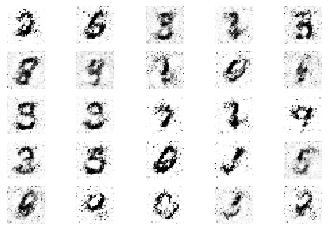

1651 [D loss: 0.596203, acc.: 70.70%] [G loss: 0.977326]
1652 [D loss: 0.561362, acc.: 78.12%] [G loss: 0.936482]
1653 [D loss: 0.613160, acc.: 68.75%] [G loss: 0.939545]
1654 [D loss: 0.633806, acc.: 64.84%] [G loss: 0.949880]
1655 [D loss: 0.600884, acc.: 69.53%] [G loss: 0.948094]
1656 [D loss: 0.577906, acc.: 73.05%] [G loss: 0.944855]
1657 [D loss: 0.597694, acc.: 69.53%] [G loss: 0.981577]
1658 [D loss: 0.612384, acc.: 67.97%] [G loss: 0.929651]
1659 [D loss: 0.596279, acc.: 68.36%] [G loss: 0.948905]
1660 [D loss: 0.597989, acc.: 71.09%] [G loss: 1.010164]
1661 [D loss: 0.601992, acc.: 70.70%] [G loss: 0.964720]
1662 [D loss: 0.569110, acc.: 74.22%] [G loss: 0.969239]
1663 [D loss: 0.620723, acc.: 64.06%] [G loss: 0.944953]
1664 [D loss: 0.575323, acc.: 72.27%] [G loss: 0.973692]
1665 [D loss: 0.602139, acc.: 71.09%] [G loss: 0.960305]
1666 [D loss: 0.606626, acc.: 69.14%] [G loss: 0.919354]
1667 [D loss: 0.628687, acc.: 66.02%] [G loss: 0.915573]
1668 [D loss: 0.592384, acc.: 6

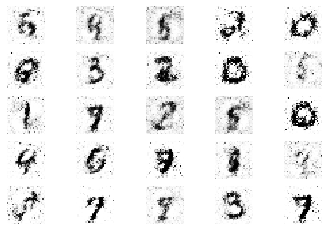

1701 [D loss: 0.613229, acc.: 67.58%] [G loss: 0.948944]
1702 [D loss: 0.595883, acc.: 73.44%] [G loss: 0.974667]
1703 [D loss: 0.653627, acc.: 60.94%] [G loss: 0.942077]
1704 [D loss: 0.632818, acc.: 64.06%] [G loss: 0.905887]
1705 [D loss: 0.616074, acc.: 67.58%] [G loss: 0.967437]
1706 [D loss: 0.614366, acc.: 70.31%] [G loss: 0.946905]
1707 [D loss: 0.634750, acc.: 63.67%] [G loss: 0.917863]
1708 [D loss: 0.587929, acc.: 72.27%] [G loss: 0.927268]
1709 [D loss: 0.619334, acc.: 65.62%] [G loss: 0.893822]
1710 [D loss: 0.610479, acc.: 69.92%] [G loss: 0.904369]
1711 [D loss: 0.590919, acc.: 75.00%] [G loss: 0.916075]
1712 [D loss: 0.642624, acc.: 66.02%] [G loss: 0.918148]
1713 [D loss: 0.624660, acc.: 64.45%] [G loss: 0.934433]
1714 [D loss: 0.595052, acc.: 69.53%] [G loss: 0.920777]
1715 [D loss: 0.631440, acc.: 62.50%] [G loss: 0.961201]
1716 [D loss: 0.590238, acc.: 74.22%] [G loss: 0.934827]
1717 [D loss: 0.608989, acc.: 67.19%] [G loss: 0.942252]
1718 [D loss: 0.611814, acc.: 6

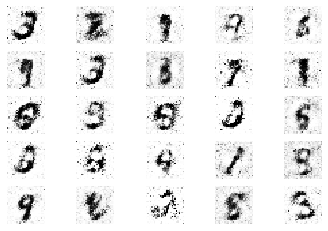

1751 [D loss: 0.598000, acc.: 68.36%] [G loss: 0.955293]
1752 [D loss: 0.599092, acc.: 68.75%] [G loss: 0.971920]
1753 [D loss: 0.612985, acc.: 65.23%] [G loss: 0.945781]
1754 [D loss: 0.572947, acc.: 75.00%] [G loss: 0.966131]
1755 [D loss: 0.628160, acc.: 66.80%] [G loss: 0.986852]
1756 [D loss: 0.588681, acc.: 68.75%] [G loss: 0.977198]
1757 [D loss: 0.605376, acc.: 68.75%] [G loss: 0.999458]
1758 [D loss: 0.603312, acc.: 71.88%] [G loss: 0.987054]
1759 [D loss: 0.623421, acc.: 66.02%] [G loss: 0.952976]
1760 [D loss: 0.624281, acc.: 68.36%] [G loss: 0.946941]
1761 [D loss: 0.587392, acc.: 73.44%] [G loss: 0.968047]
1762 [D loss: 0.597405, acc.: 67.58%] [G loss: 0.937647]
1763 [D loss: 0.607695, acc.: 65.62%] [G loss: 0.976923]
1764 [D loss: 0.585533, acc.: 71.88%] [G loss: 0.987271]
1765 [D loss: 0.623007, acc.: 68.36%] [G loss: 0.959930]
1766 [D loss: 0.596224, acc.: 71.48%] [G loss: 0.982236]
1767 [D loss: 0.566557, acc.: 76.56%] [G loss: 0.959001]
1768 [D loss: 0.610389, acc.: 7

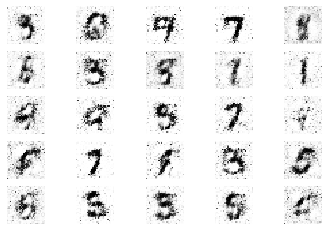

1801 [D loss: 0.571110, acc.: 76.17%] [G loss: 0.935472]
1802 [D loss: 0.567912, acc.: 78.52%] [G loss: 0.977751]
1803 [D loss: 0.566650, acc.: 78.52%] [G loss: 0.982577]
1804 [D loss: 0.592302, acc.: 68.36%] [G loss: 0.958247]
1805 [D loss: 0.611379, acc.: 67.19%] [G loss: 0.950283]
1806 [D loss: 0.610643, acc.: 66.80%] [G loss: 0.956965]
1807 [D loss: 0.616501, acc.: 68.36%] [G loss: 0.925138]
1808 [D loss: 0.603867, acc.: 69.14%] [G loss: 0.929013]
1809 [D loss: 0.619136, acc.: 67.97%] [G loss: 0.919464]
1810 [D loss: 0.614392, acc.: 67.97%] [G loss: 0.961859]
1811 [D loss: 0.603217, acc.: 74.61%] [G loss: 0.921563]
1812 [D loss: 0.599565, acc.: 71.48%] [G loss: 0.974474]
1813 [D loss: 0.581285, acc.: 76.17%] [G loss: 0.896036]
1814 [D loss: 0.621592, acc.: 64.45%] [G loss: 0.911127]
1815 [D loss: 0.611441, acc.: 67.97%] [G loss: 0.919555]
1816 [D loss: 0.597964, acc.: 69.92%] [G loss: 0.929988]
1817 [D loss: 0.601566, acc.: 70.70%] [G loss: 0.938601]
1818 [D loss: 0.575059, acc.: 7

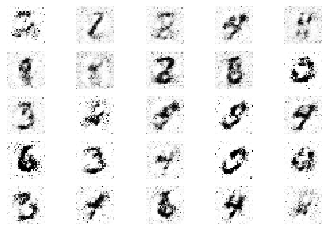

1851 [D loss: 0.577744, acc.: 73.05%] [G loss: 0.971423]
1852 [D loss: 0.602230, acc.: 69.92%] [G loss: 0.974761]
1853 [D loss: 0.616108, acc.: 66.02%] [G loss: 0.961820]
1854 [D loss: 0.609122, acc.: 71.48%] [G loss: 0.959964]
1855 [D loss: 0.570340, acc.: 76.17%] [G loss: 0.957078]
1856 [D loss: 0.576488, acc.: 75.39%] [G loss: 0.947364]
1857 [D loss: 0.577135, acc.: 78.91%] [G loss: 0.963270]
1858 [D loss: 0.557447, acc.: 75.78%] [G loss: 0.969339]
1859 [D loss: 0.550250, acc.: 78.91%] [G loss: 1.007444]
1860 [D loss: 0.557928, acc.: 76.17%] [G loss: 1.012603]
1861 [D loss: 0.558858, acc.: 78.52%] [G loss: 1.022725]
1862 [D loss: 0.564298, acc.: 72.27%] [G loss: 1.033673]
1863 [D loss: 0.568039, acc.: 71.48%] [G loss: 1.035965]
1864 [D loss: 0.575648, acc.: 76.17%] [G loss: 1.001848]
1865 [D loss: 0.569210, acc.: 73.83%] [G loss: 1.045816]
1866 [D loss: 0.536801, acc.: 79.69%] [G loss: 0.996762]
1867 [D loss: 0.558878, acc.: 78.91%] [G loss: 0.997843]
1868 [D loss: 0.554704, acc.: 7

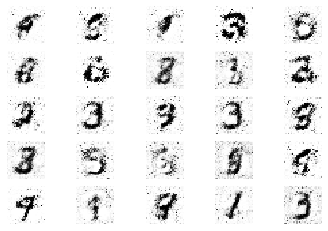

1901 [D loss: 0.563250, acc.: 74.22%] [G loss: 1.072800]
1902 [D loss: 0.544972, acc.: 75.39%] [G loss: 1.082669]
1903 [D loss: 0.543397, acc.: 80.47%] [G loss: 1.035632]
1904 [D loss: 0.560556, acc.: 78.52%] [G loss: 1.022192]
1905 [D loss: 0.530989, acc.: 79.69%] [G loss: 1.011809]
1906 [D loss: 0.562347, acc.: 73.05%] [G loss: 1.029875]
1907 [D loss: 0.549328, acc.: 77.73%] [G loss: 1.050341]
1908 [D loss: 0.560035, acc.: 76.56%] [G loss: 1.048823]
1909 [D loss: 0.556289, acc.: 74.22%] [G loss: 1.056764]
1910 [D loss: 0.513712, acc.: 79.30%] [G loss: 1.061088]
1911 [D loss: 0.560321, acc.: 75.39%] [G loss: 1.078400]
1912 [D loss: 0.539301, acc.: 78.52%] [G loss: 1.059693]
1913 [D loss: 0.541280, acc.: 75.78%] [G loss: 1.035023]
1914 [D loss: 0.509348, acc.: 83.98%] [G loss: 1.008434]
1915 [D loss: 0.527142, acc.: 81.25%] [G loss: 1.120568]
1916 [D loss: 0.573698, acc.: 72.66%] [G loss: 1.016543]
1917 [D loss: 0.559368, acc.: 72.27%] [G loss: 1.006449]
1918 [D loss: 0.550112, acc.: 7

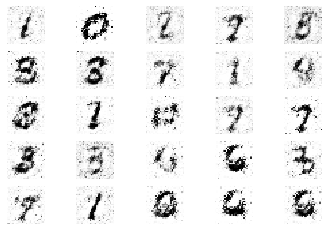

1951 [D loss: 0.584454, acc.: 68.75%] [G loss: 0.984713]
1952 [D loss: 0.579259, acc.: 73.05%] [G loss: 0.999257]
1953 [D loss: 0.587613, acc.: 67.58%] [G loss: 1.023191]
1954 [D loss: 0.611268, acc.: 68.36%] [G loss: 0.917290]
1955 [D loss: 0.573100, acc.: 73.44%] [G loss: 0.996119]
1956 [D loss: 0.572520, acc.: 73.05%] [G loss: 1.029023]
1957 [D loss: 0.602949, acc.: 70.31%] [G loss: 0.985027]
1958 [D loss: 0.595282, acc.: 71.48%] [G loss: 1.009634]
1959 [D loss: 0.601543, acc.: 68.36%] [G loss: 0.987190]
1960 [D loss: 0.605961, acc.: 67.19%] [G loss: 1.001330]
1961 [D loss: 0.590478, acc.: 71.09%] [G loss: 0.977731]
1962 [D loss: 0.592914, acc.: 69.14%] [G loss: 1.007612]
1963 [D loss: 0.594147, acc.: 69.53%] [G loss: 0.994794]
1964 [D loss: 0.570253, acc.: 73.05%] [G loss: 1.007827]
1965 [D loss: 0.591914, acc.: 74.61%] [G loss: 0.971668]
1966 [D loss: 0.575463, acc.: 74.61%] [G loss: 0.965625]
1967 [D loss: 0.569856, acc.: 70.31%] [G loss: 1.021337]
1968 [D loss: 0.568768, acc.: 7

In [8]:
epochs=2000
for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random batch of images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate a batch of new images
    gen_imgs = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (to have the discriminator label samples as valid)
    g_loss = GAN.train_on_batch(noise, valid)

    # Plot the progress
    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

    # If at save interval => save generated image samples
    if epoch % sample_interval == 0:
        sample_images(epoch)
